*Supervised Learning* <br>
- Regression <br>
- Characterisation <br>

*Unsuperviseed Learning* <br>
- Clustering <br>
- Anomaly detection <br>
- Approaches to learning latent variables <br>

# Notation

Training set
- $x^i$ is the input variable or the feature variable
- $y^i$ is the output variable or the target variable
- $(x^i, y^i)$ is the vay we denote an input

$f$ is the function which is used to give the output/estimate $\hat{y}$ and $f$ is the model to predict the estimate where $y$ is the target ans $x$ is the input

# Linear Regression

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [49]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [50]:
# or 
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


In [51]:
i = 0

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


# Plotting the function

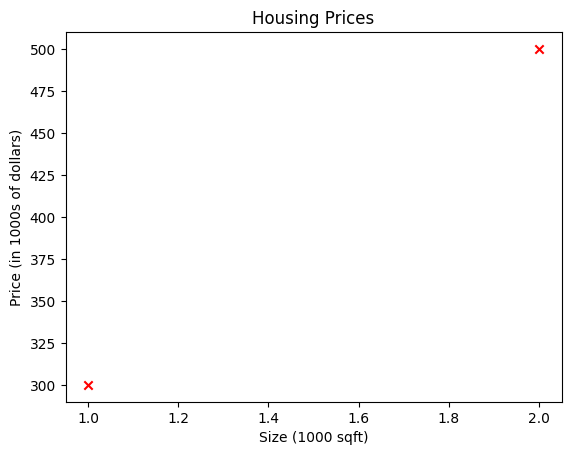

In [52]:
plt.scatter(x_train, y_train, marker = 'x', c='r')
# c shows the points as red crosses
plt.title("Housing Prices")

plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.show()

In [53]:
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


In [54]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

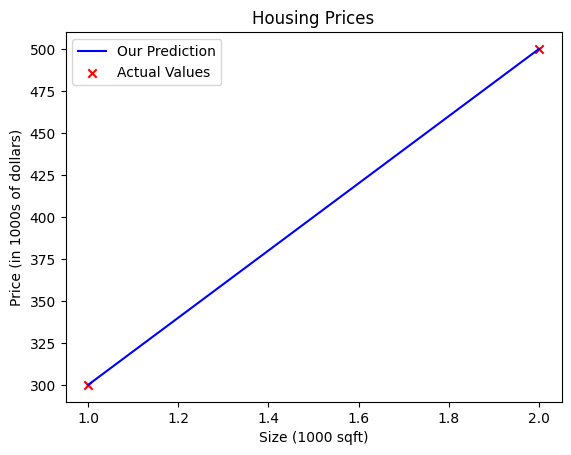

In [55]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Here w and b are parameters

# Cost function

Error is written as $(\hat{y}^{(i)} - y^{(i)})$ <br>
Then we compute the square of this...
so we use the RMS value for all i's
$$\bar{J}(w, b) = \frac{1}{2m}{\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^{2}}$$

# Gradient Descent

Gradient descent algorithm may be writtern as
$$w = w - \alpha\frac{\partial}{\partial w}J(w, b)$$
$$b = b - \alpha\frac{\partial}{\partial b}J(w, b)$$
$\alpha$ is the "learning rate" between 0 and 1, where it defines the "step" taken down the function <br>

Make sure to update the w and b at the same time and not sequentially, the way we can do this is by first calculating the derivative and the finally updating the value of w and b later, as updating a value before may alter the derivative and hence the algorithm

# Final Linear Regression

In [56]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [57]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [58]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2*m)*cost

    return total_cost

In [97]:
def compute_gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i]+b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [98]:
x_axis = np.linspace(-100, 600, 500)
y_axis = np.linspace(-200, 200, 500)
x, y = np.meshgrid(x_axis, y_axis)

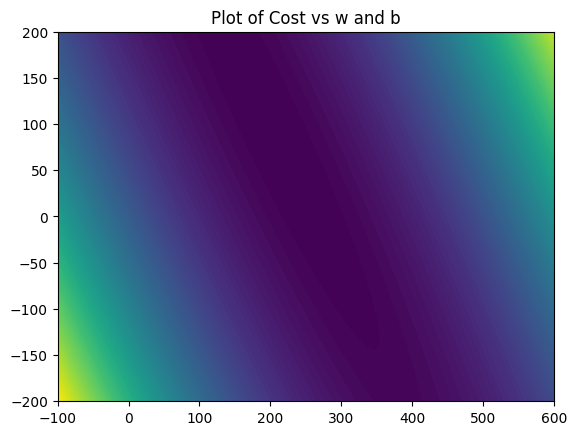

In [99]:
plt.title("Plot of Cost vs w and b")
plt.contourf(x, y, compute_cost(x_train, y_train, x, y), levels = 100)

In [1]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        b = b - alpha*dj_db
        w = w - alpha*dj_dw

        if i < 1000000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history 

In [101]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(b_final)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


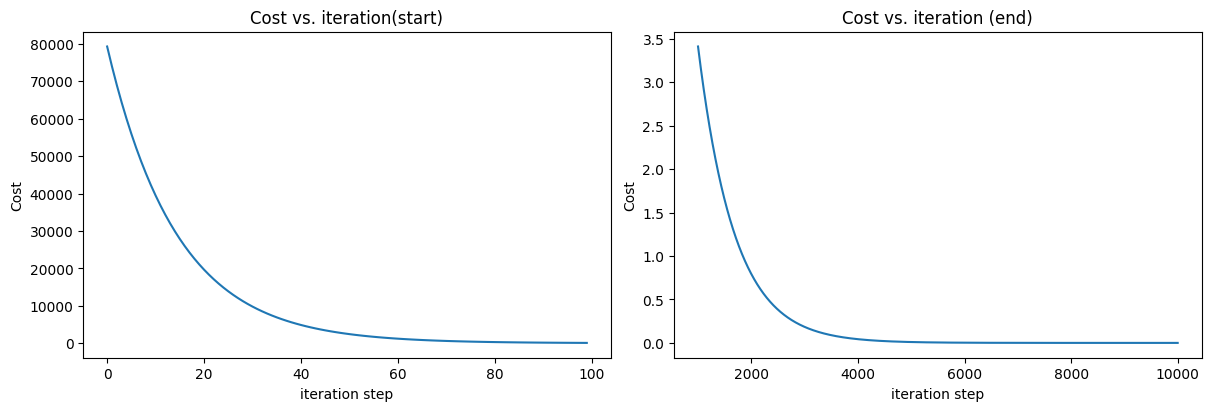

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [103]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
